In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("Datasets/AS2(t-12).csv")
data1=df1["clave"]
df1.drop(columns=["clave"],axis=1,inplace=True)
df1['hour(t)']=list(np.arange(13,24))+list(np.arange(0,24))*1307
df1=df1.reindex(columns=['var1(t-12)','var2(t-12)','var3(t-12)','var4(t-12)','var5(t-12)','var6(t-12)','var7(t-12)','var8(t-12)','hour(t)','obj'])

print(df1)
print(data1)

       var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31374         261       260.0       114.0       218.0         0.0       170.0   
31375         395       420.0       170.0       218.0         0.0       170.0   
31376         459       590.0       228.0       218.0         0.0       170.0   
31377         631       696.0       305.0       218.0         0.0       170.0   
31378         743       852.0       353.0       218.0         0.0       170.0   

       var7(t-12) var8(t-12

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['var8(t-12)']=le.fit_transform(df1['var8(t-12)'])
# le.transform(df['var8(t-12)'])
print(df1)

       var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31374         261       260.0       114.0       218.0         0.0       170.0   
31375         395       420.0       170.0       218.0         0.0       170.0   
31376         459       590.0       228.0       218.0         0.0       170.0   
31377         631       696.0       305.0       218.0         0.0       170.0   
31378         743       852.0       353.0       218.0         0.0       170.0   

       var7(t-12)  var8(t-1

In [4]:
def slicing_data(data,rows):
    x=list()
    y=list()
    for i in np.arange(rows-1,len(data)):
        y.append(data.iloc[i][-1])
        x.append([data.iloc[i-3][:-1],data.iloc[i-2][:-1],data.iloc[i-1][:-1],data.iloc[i][:-1]])
    
    return np.array(x).astype('float32'),np.array(y).astype('float32')

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split

In [6]:
scaler=MinMaxScaler()
df1[df1.columns.difference(['obj'])]=scaler.fit_transform(df1[df1.columns.difference(['obj'])])

In [7]:
x,y=slicing_data(df1,4)
print(x)
print(y)

[[[0.08009199 0.33433804 0.22783934 ... 0.27970296 0.33333334 0.5652174 ]
  [0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]]

 [[0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]]

 [[0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]
  [0.05339466 0.0839323  0.04466759 ... 0.27970296 0.33333334 0.7826087 ]]

 ...

 [[0.02489751 0.03825643 0.02285319 ... 0.64851487 1.         0.7826087 ]
  [0.02629737 0.06028287 0

In [8]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(x,y,test_size=0.333,random_state=42)

In [9]:
df2=pd.read_csv("Datasets/AS2(t-24).csv")
data2=df2["clave"]
df2.drop(columns=["clave"],axis=1,inplace=True)
df2['hour(t)']=list(np.arange(13,24))+list(np.arange(0,24))*1306+list(np.arange(0,12))
df2=df2.reindex(columns=['var1(t-24)','var2(t-24)','var3(t-24)','var4(t-24)','var5(t-24)','var6(t-24)','var7(t-24)','var8(t-24)','hour(t)','obj'])

print(df2)
print(data2)

       var1(t-24)  var2(t-24)  var3(t-24)  var4(t-24)  var5(t-24)  var6(t-24)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31362         895      1173.0       458.0       270.0         0.0       199.0   
31363         940      1177.0       451.0       270.0         0.0       199.0   
31364         860       838.0       374.0       270.0         0.0       199.0   
31365         800       594.0       261.0       270.0         0.0       199.0   
31366         726       541.0       190.0       270.0         0.0       199.0   

       var7(t-24) var8(t-24

In [10]:

df2['var8(t-24)']=le.fit_transform(df2['var8(t-24)'])
print(df2)

       var1(t-24)  var2(t-24)  var3(t-24)  var4(t-24)  var5(t-24)  var6(t-24)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31362         895      1173.0       458.0       270.0         0.0       199.0   
31363         940      1177.0       451.0       270.0         0.0       199.0   
31364         860       838.0       374.0       270.0         0.0       199.0   
31365         800       594.0       261.0       270.0         0.0       199.0   
31366         726       541.0       190.0       270.0         0.0       199.0   

       var7(t-24)  var8(t-2

In [11]:
df2[df2.columns.difference(['obj'])]=scaler.fit_transform(df2[df2.columns.difference(['obj'])])

In [12]:
x,y=slicing_data(df2,4)
print(x)
print(y)

[[[0.08009199 0.33433804 0.22783934 ... 0.27970296 0.33333334 0.5652174 ]
  [0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]]

 [[0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]]

 [[0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]
  [0.05339466 0.0839323  0.04466759 ... 0.27970296 0.33333334 0.7826087 ]]

 ...

 [[0.08419158 0.30095062 0.1679363  ... 0.8366337  0.6666667  0.26086956]
  [0.08969103 0.27196845 0

In [13]:
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(x,y,test_size=0.333,random_state=42)

In [14]:
df3=pd.read_csv("Datasets/AS2(t-48).csv")
data3=df3["clave"]
df3.drop(columns=["clave"],axis=1,inplace=True)
df3['hour(t)']=list(np.arange(13,24))+list(np.arange(0,24))*1305+list(np.arange(0,12))
df3=df3.reindex(columns=['var1(t-48)','var2(t-48)','var3(t-48)','var4(t-48)','var5(t-48)','var6(t-48)','var7(t-48)','var8(t-48)','hour(t)','obj'])

print(df3)
print(data3)

       var1(t-48)  var2(t-48)  var3(t-48)  var4(t-48)  var5(t-48)  var6(t-48)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31338        1001      1583.0       571.0       288.0         0.0       220.0   
31339        1075      1364.0       542.0       288.0         0.0       220.0   
31340         858       962.0       392.0       288.0         0.0       220.0   
31341         750       679.0       247.0       288.0         0.0       220.0   
31342         713       593.0       191.0       288.0         0.0       220.0   

       var7(t-48) var8(t-48

In [15]:
df3['var8(t-48)']=le.fit_transform(df3['var8(t-48)'])
print(df3)

       var1(t-48)  var2(t-48)  var3(t-48)  var4(t-48)  var5(t-48)  var6(t-48)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31338        1001      1583.0       571.0       288.0         0.0       220.0   
31339        1075      1364.0       542.0       288.0         0.0       220.0   
31340         858       962.0       392.0       288.0         0.0       220.0   
31341         750       679.0       247.0       288.0         0.0       220.0   
31342         713       593.0       191.0       288.0         0.0       220.0   

       var7(t-48)  var8(t-4

In [16]:
df3[df3.columns.difference(['obj'])]=scaler.fit_transform(df3[df3.columns.difference(['obj'])])

In [17]:
x,y=slicing_data(df3,4)
print(x)
print(y)

[[[0.08009199 0.33433804 0.22783934 ... 0.27970296 0.33333334 0.5652174 ]
  [0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]]

 [[0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]]

 [[0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]
  [0.05339466 0.0839323  0.04466759 ... 0.27970296 0.33333334 0.7826087 ]]

 ...

 [[0.10158984 0.37166706 0.20637119 ... 0.87623763 0.6666667  0.26086956]
  [0.10028997 0.3670299  0

In [18]:
X_train_3,X_test_3,y_train_3,y_test_3=train_test_split(x,y,test_size=0.333,random_state=42)

In [19]:
df4=pd.read_csv("Datasets/AS2(t-72).csv")
data4=df4["clave"]
df4.drop(columns=["clave"],axis=1,inplace=True)
df4['hour(t)']=list(np.arange(13,24))+list(np.arange(0,24))*1304+list(np.arange(0,12))
df4=df4.reindex(columns=['var1(t-72)','var2(t-72)','var3(t-72)','var4(t-72)','var5(t-72)','var6(t-72)','var7(t-72)','var8(t-72)','hour(t)','obj'])

print(df4)
print(data4)

       var1(t-72)  var2(t-72)  var3(t-72)  var4(t-72)  var5(t-72)  var6(t-72)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31314         971      1559.0       523.0       282.0         0.0       207.0   
31315         955      1417.0       519.0       282.0         0.0       207.0   
31316         831       900.0       362.0       282.0         0.0       207.0   
31317         745       626.0       221.0       282.0         0.0       207.0   
31318         685       546.0       207.0       282.0         0.0       207.0   

       var7(t-72) var8(t-72

In [20]:
df4['var8(t-72)']=le.fit_transform(df4['var8(t-72)'])
print(df4)

       var1(t-72)  var2(t-72)  var3(t-72)  var4(t-72)  var5(t-72)  var6(t-72)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31314         971      1559.0       523.0       282.0         0.0       207.0   
31315         955      1417.0       519.0       282.0         0.0       207.0   
31316         831       900.0       362.0       282.0         0.0       207.0   
31317         745       626.0       221.0       282.0         0.0       207.0   
31318         685       546.0       207.0       282.0         0.0       207.0   

       var7(t-72)  var8(t-7

In [21]:
df4[df4.columns.difference(['obj'])]=scaler.fit_transform(df4[df4.columns.difference(['obj'])])

In [22]:
x,y=slicing_data(df4,4)
print(x)
print(y)

[[[0.08009199 0.33433804 0.22783934 ... 0.27970296 0.33333334 0.5652174 ]
  [0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]]

 [[0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]]

 [[0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]
  [0.05339466 0.0839323  0.04466759 ... 0.27970296 0.33333334 0.7826087 ]]

 ...

 [[0.09579042 0.3844192  0.2184903  ... 0.87376237 0.6666667  0.26086956]
  [0.09729027 0.36146533 0

In [23]:
X_train_4,X_test_4,y_train_4,y_test_4=train_test_split(x,y,test_size=0.333,random_state=42)

In [24]:
from tensorflow.keras.models import load_model

In [25]:
savedModel_1_12=load_model('cnn_bi_lstm/model_12.h5')
savedModel_1_24=load_model('cnn_bi_lstm/model_24.h5')
savedModel_1_48=load_model('cnn_bi_lstm/model_48.h5')
savedModel_1_72=load_model('cnn_bi_lstm/model_72.h5')

In [26]:
savedModel_2_12=load_model('cnn_lstm/model_12.h5')
savedModel_2_24=load_model('cnn_lstm/model_24.h5')
savedModel_2_48=load_model('cnn_lstm/model_48.h5')
savedModel_2_72=load_model('cnn_lstm/model_72.h5')

In [27]:
savedModel_3_12=load_model('lstm/model_12.h5')
savedModel_3_24=load_model('lstm/model_24.h5')
savedModel_3_48=load_model('lstm/model_48.h5')
savedModel_3_72=load_model('lstm/model_72.h5')

In [79]:
import math

In [80]:
def error(model,x,y,arr):
    pred=model.predict(x)
    pred=pred.reshape(pred.shape[0])
    # print(y_test)
    y=y.reshape(y.shape[0])
    MAE = sklearn.metrics.mean_absolute_error(pred,y)
    MSE= sklearn.metrics.mean_squared_error(pred,y)
    arr[0].append(MAE)
    arr[1].append(math.sqrt(MSE))

In [81]:
pred1=[[],[]]

error(savedModel_1_12,X_test_1,y_test_1,pred1)
error(savedModel_1_24,X_test_2,y_test_2,pred1)
error(savedModel_1_48,X_test_3,y_test_3,pred1)
error(savedModel_1_72,X_test_4,y_test_4,pred1)

326/326 [==============================] - 10s 31ms/step


In [82]:
pred2=[[],[]]

error(savedModel_2_12,X_test_1,y_test_1,pred2)
error(savedModel_2_24,X_test_2,y_test_2,pred2)
error(savedModel_2_48,X_test_3,y_test_3,pred2)
error(savedModel_2_72,X_test_4,y_test_4,pred2)

326/326 [==============================] - 18s 54ms/step


In [83]:
pred3=[[],[]]

error(savedModel_3_12,X_test_1,y_test_1,pred3)
error(savedModel_3_24,X_test_2,y_test_2,pred3)
error(savedModel_3_48,X_test_3,y_test_3,pred3)
error(savedModel_3_72,X_test_4,y_test_4,pred3)

326/326 [==============================] - 4s 12ms/step


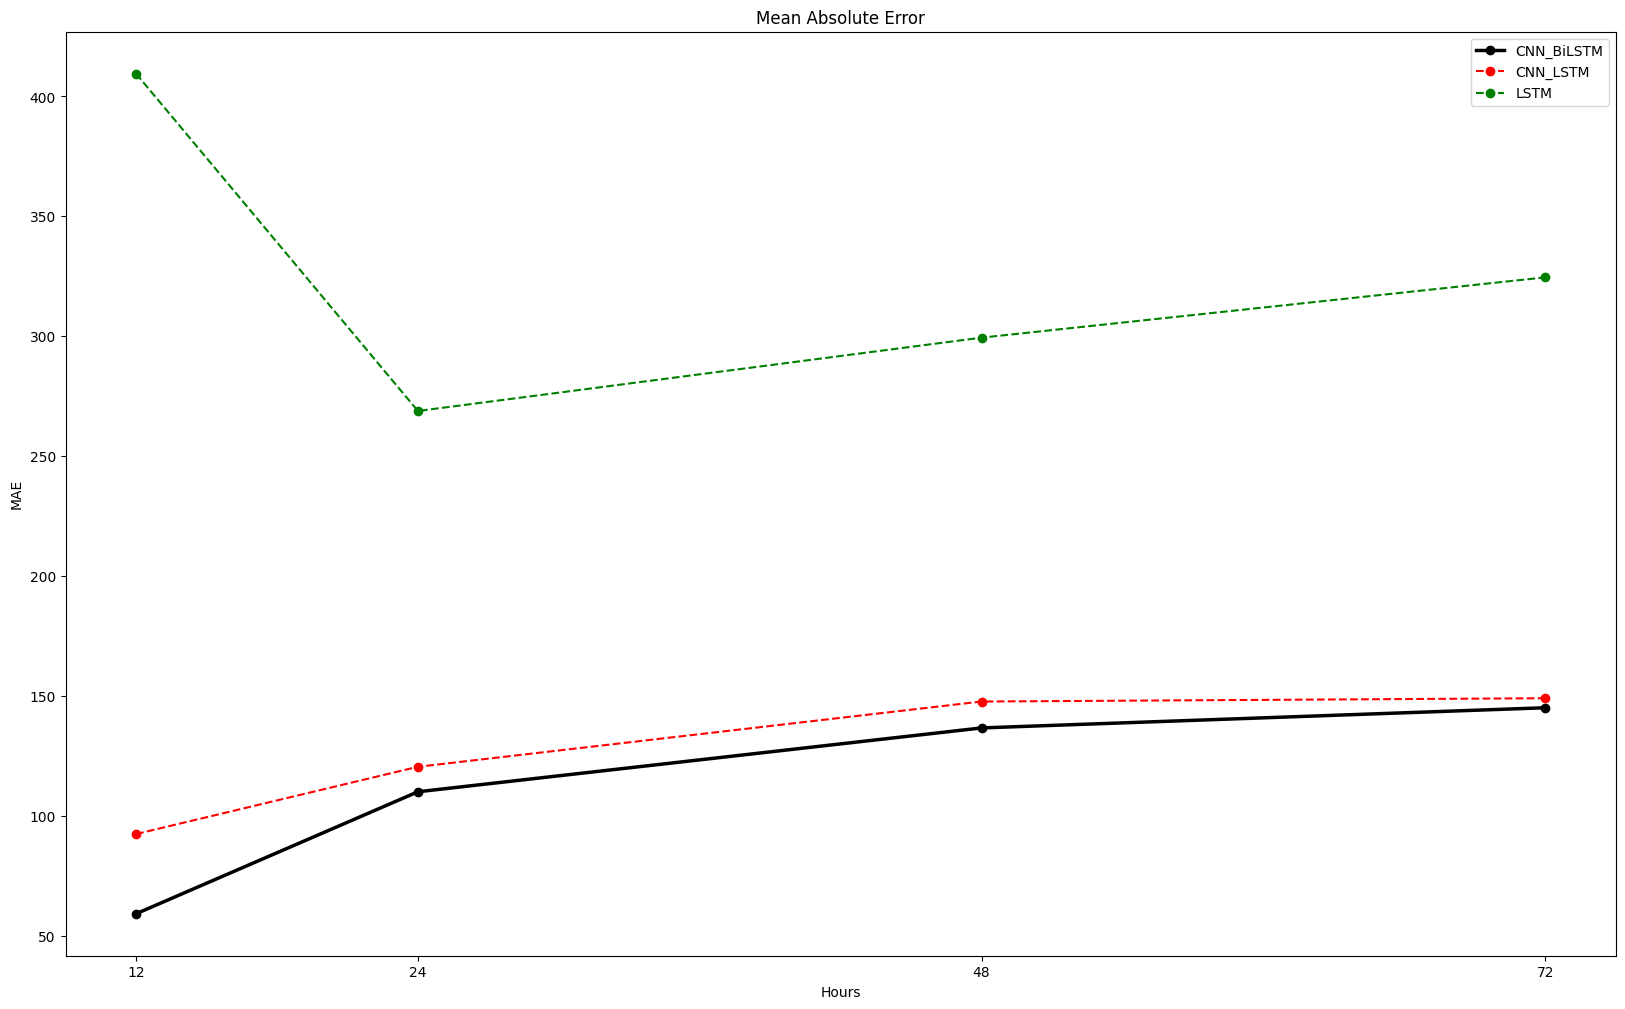

In [85]:
plt.figure(figsize=(20, 12))
x=[12,24,48,72]
plt.plot(x,pred1[0],'ko-', linewidth=2.5,label = "CNN_BiLSTM")
plt.plot(x,pred2[0],'ro--', label = "CNN_LSTM",)
plt.plot(x,pred3[0],'go--', label = "LSTM")
plt.xticks([12,24,48,72])
plt.legend()
plt.title("Mean Absolute Error")
plt.xlabel('Hours')
plt.ylabel('MAE')
plt.show()

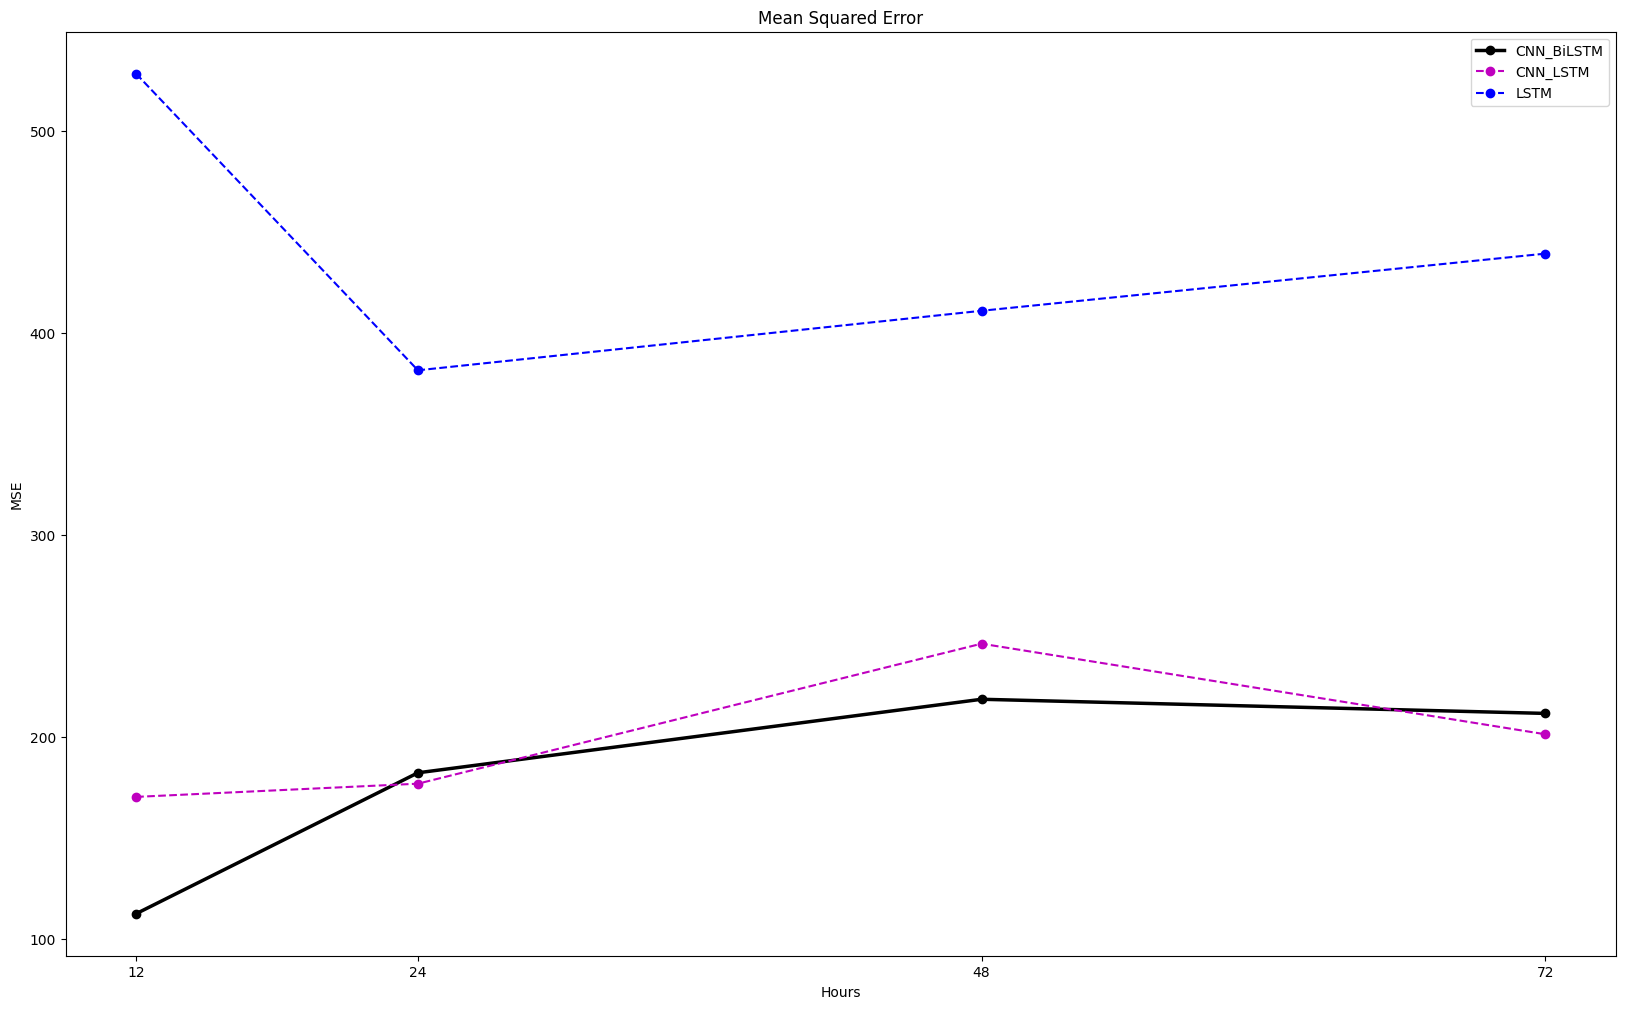

In [86]:
plt.figure(figsize=(20, 12))
x=[12,24,48,72]
plt.plot(x,pred1[1],'ko-', linewidth=2.5,label = "CNN_BiLSTM")
plt.plot(x,pred2[1],'mo--', label = "CNN_LSTM",)
plt.plot(x,pred3[1],'bo--', label = "LSTM")
plt.xticks([12,24,48,72])
plt.legend()
plt.title("Mean Squared Error")
plt.xlabel('Hours')
plt.ylabel('MSE')
plt.show()